# Now since we are done with the EDA let's make a recommender system using  KNN machine learning algroithms 

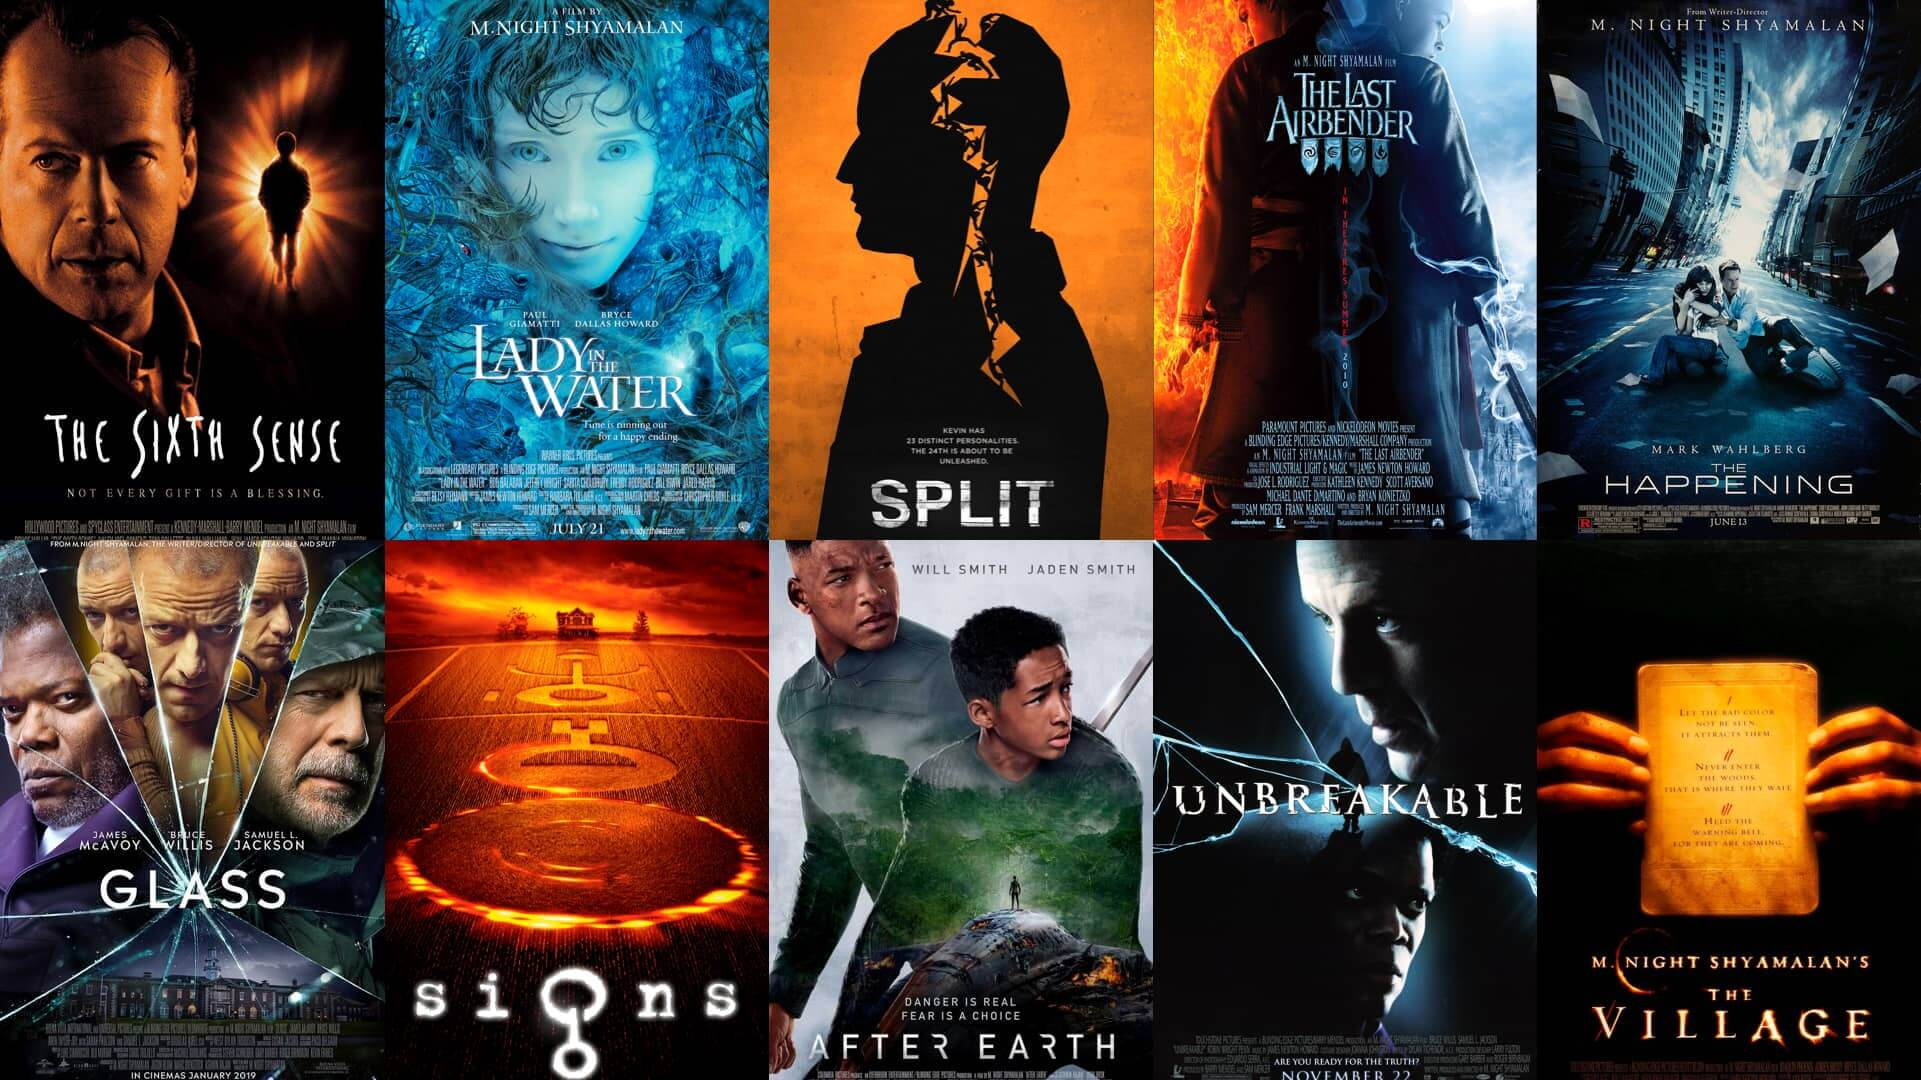

In [1]:
#setting up for working directory   

In [16]:
pwd

'C:\\Users\\Deepu\\Downloads'

In [17]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [18]:
import pandas as pd
import numpy as np

In [19]:
# reading the date 

imdb_df = pd.read_csv('imdb_data.csv')

In [20]:
imdb_df.shape

(3000, 23)

In [23]:
#Droping the null values from the dataset
# we will drop all the rows which have null values and only work with non-null values
imdb_df.dropna(axis = 0,inplace = True)

In [22]:
imdb_df.shape

(203, 23)

In [24]:
imdb_df.genres

22      [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...
40      [{'id': 28, 'name': 'Action'}, {'id': 99, 'nam...
46      [{'id': 16, 'name': 'Animation'}, {'id': 10751...
60      [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
69      [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
                              ...                        
2904    [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
2927    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
2938    [{'id': 878, 'name': 'Science Fiction'}, {'id'...
2968    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
2984    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, Length: 203, dtype: object

In [25]:
for i in eval(imdb_df.genres[22]):
    print(i['name'])

Thriller
Horror


In [26]:
imdb_df.genres.isnull().sum()

0

In [27]:
imdb_df[imdb_df.genres == np.nan]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [28]:
imdb_df[imdb_df.genres == " "]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [29]:
np.nan in imdb_df.genres.tolist()

False

In [30]:
count = 0
for i in imdb_df.genres.tolist():
    count += 1
print(count)    

203


In [31]:
imdb_df[imdb_df.genres == np.NaN]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [32]:
imdb_df.genres.tolist()[470:473]

[]

In [34]:
imdb_df.genres.tolist()[470]

IndexError: list index out of range

In [35]:
imdb_df.genres.tolist()[471]

IndexError: list index out of range

In [36]:
imdb_df[470:475]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [37]:
imdb_df[imdb_df.runtime == 100]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
471,472,"[{'id': 86119, 'name': 'The Hangover Collectio...",35000000,"[{'id': 35, 'name': 'Comedy'}]",http://hangoverpart2.warnerbros.com/dvd/,tt1119646,en,The Hangover,When three friends finally come to after a rau...,23.947351,...,6/5/09,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some guys just can't handle Vegas.,The Hangover,"[{'id': 3508, 'name': 'underwear'}, {'id': 480...","[{'cast_id': 1, 'character': 'Phil Wenneck', '...","[{'credit_id': '52fe479a9251416c7509f653', 'de...",459270619
1124,1125,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",105000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.iceagemovies.com/films/ice-age-coll...,tt3416828,en,Ice Age: Collision Course,"Set after the events of Continental Drift, Scr...",20.151037,...,6/23/16,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One small step. One giant mess.,Ice Age: Collision Course,"[{'id': 657, 'name': 'fire'}, {'id': 1445, 'na...","[{'cast_id': 7, 'character': 'Manny (voice)', ...","[{'credit_id': '551b875dc3a3687670001d1e', 'de...",408579038
1208,1209,"[{'id': 86058, 'name': 'Dirty Dancing Collecti...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",http://lionsgateathome.com/dirty-dancing,tt0092890,en,Dirty Dancing,Expecting the usual tedium that accompanies a ...,14.044122,...,8/21/87,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Have the time of your life.,Dirty Dancing,"[{'id': 246, 'name': 'dancing'}, {'id': 572, '...","[{'cast_id': 7, 'character': 'Baby (Frances) H...","[{'credit_id': '52fe4215c3a36847f8002ced', 'de...",213954274
2030,2031,"[{'id': 281644, 'name': 'Rocky Horror Collecti...",1200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.rockyhorror.com/,tt0073629,en,The Rocky Horror Picture Show,"Sweethearts Brad and Janet, stuck with a flat ...",8.699428,...,8/14/75,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Different Set Of Jaws.,The Rocky Horror Picture Show,"[{'id': 108, 'name': 'transvestism'}, {'id': 2...","[{'cast_id': 8, 'character': 'Dr. Frank-N-Furt...","[{'credit_id': '52fe46029251416c91045f0b', 'de...",112892319
2248,2249,"[{'id': 17255, 'name': 'Resident Evil Collecti...",33000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.sonypictures.com/movies/residentevi...,tt0120804,en,Resident Evil,"When a virus leaks from a top-secret facility,...",7.781293,...,3/15/02,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A secret experiment. A deadly virus. A fatal m...,Resident Evil,"[{'id': 1568, 'name': 'undercover'}, {'id': 18...","[{'cast_id': 1, 'character': 'Alice', 'credit_...","[{'credit_id': '52fe42ffc3a36847f8032c21', 'de...",102984862
2276,2277,"[{'id': 286038, 'name': 'Dead Snow Collection'...",0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.deadsnow.com/,tt2832470,no,Død Snø 2,The gruesome Nazi Zombies are back to finish t...,10.287127,...,2/12/14,100.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Heads up. They're back.,Dead Snow 2: Red vs. Dead,"[{'id': 2652, 'name': 'nazis'}, {'id': 9663, '...","[{'cast_id': 19, 'character': 'Martin', 'credi...","[{'credit_id': '52fe4ebfc3a36847f82a57f3', 'de...",37473


In [38]:
def gen_list(cell):
    
    listy = [] # creating a empty list to store varaibles 
    cell = str(cell) # converting it to string as lambda is not taking it as strin this is done as per error thrown at us
    if cell != 'nan':# checking if there is nan value or not
        for elem in eval(cell): # iterating and coverting all the string datatype into the datatype i.e '[]' to []
            listy.append(elem['name']) # getting all the genres from the list of dictionary and store them into listy
    else:# if it is a null then pass
        return np.nan
    
    return listy

In [39]:
imdb_df['genres'].apply(lambda x: gen_list(x))

22                          [Thriller, Horror]
40                       [Action, Documentary]
46      [Animation, Family, Comedy, Adventure]
60               [Adventure, Action, Thriller]
69            [Action, Crime, Drama, Thriller]
                         ...                  
2904                            [Drama, Crime]
2927             [Adventure, Action, Thriller]
2938     [Science Fiction, Adventure, Mystery]
2968      [Action, Adventure, Fantasy, Horror]
2984                 [Action, Thriller, Crime]
Name: genres, Length: 203, dtype: object

In [40]:
imdb_df['genres_list'] = imdb_df['genres'].apply(lambda x: gen_list(x))

In [41]:
imdb_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_list
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",http://www.magnetreleasing.com/vhs/,tt2105044,en,V/H/S,When a group of misfits is hired by an unknown...,7.820787,...,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This collection is killer.,V/H/S,"[{'id': 6435, 'name': 'webcam'}, {'id': 9706, ...","[{'cast_id': 1, 'character': 'Gary', 'credit_i...","[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345,"[Thriller, Horror]"
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 99, 'nam...",http://www.magpictures.com/profile.aspx?id=983...,tt0380268,en,Cocaine Cowboys,"In the 1980s, ruthless Colombian cocaine baron...",2.941626,...,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How Miami became the cocaine capital of the Un...,Cocaine Cowboys,"[{'id': 2150, 'name': 'cocaine'}, {'id': 2231,...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe46179251416c7506cc15', 'de...",163000,"[Action, Documentary]"
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.iceagemovies.com/films/ice-age-the-...,tt0438097,en,Ice Age: The Meltdown,"Diego, Manny and Sid return in this sequel to ...",16.646029,...,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ice age is melting away.,Ice Age: The Meltdown,"[{'id': 2078, 'name': 'mammoth'}, {'id': 2079,...","[{'cast_id': 1, 'character': 'Manny (voice)', ...","[{'credit_id': '52fe4292c3a36847f80292c9', 'de...",660940780,"[Animation, Family, Comedy, Adventure]"
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/#/our-titles/233/Casino-Roy...,tt0381061,en,Casino Royale,"Le Chiffre, a banker to the world's terrorists...",23.065078,...,144.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,"[{'id': 131, 'name': 'italy'}, {'id': 383, 'na...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '53ac1fd7c3a3684bc8001908', 'de...",599045960,"[Adventure, Action, Thriller]"
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thefastandthefurious3.com/,tt0463985,en,The Fast and the Furious: Tokyo Drift,"In order to avoid a jail sentence, Sean Boswel...",2.238808,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On the streets of Tokyo, speed needs no transl...",The Fast and the Furious: Tokyo Drift,"[{'id': 830, 'name': 'car race'}, {'id': 1926,...","[{'cast_id': 12, 'character': 'Sean Boswell', ...","[{'credit_id': '56784ed792514111900002c8', 'de...",158468292,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,2905,"[{'id': 424202, 'name': 'Trainspotting Collect...",4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.miramax.com/movie/trainspotting/,tt0117951,en,Trainspotting,"Renton, deeply immersed in the Edinburgh drug ...",19.348466,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Choose life.,Trainspotting,"[{'id': 212, 'name': 'london england'}, {'id':...","[{'cast_id': 17, 'character': 'Mark Renton', '...","[{'credit_id': '52fe4260c3a36847f80198c1', 'de...",16491080,"[Drama, Crime]"
2927,2928,"[{'id': 645, 'name': 'James Bond Collection', ...",140000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/232/Die-Another-...,tt0246460,en,Die Another Day,Bond takes on a North Korean leader who underg...,12.996474,...,133.0,"[{'iso_639_1': 'en', 'name': 'Engl

In [42]:
df = imdb_df[['id','popularity','title','genres_list']]

In [43]:
df

,id,popularity,title,genres_list
22,23,7.820787,V/H/S,"[Thriller, Horror]"
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]"
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]"
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]"
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...
2904,2905,19.348466,Trainspotting,"[Drama, Crime]"
2927,2928,12.996474,Die Another Day,"[Adventure, Action, Thriller]"
2938,2939,16.624854,Prometheus,"[Science Fiction, Adventure, Mystery]"
2968,2969,6.514132,BloodRayne,"[Action, Adventure, Fantasy, Horror]"


In [44]:
df.genres_list

22                          [Thriller, Horror]
40                       [Action, Documentary]
46      [Animation, Family, Comedy, Adventure]
60               [Adventure, Action, Thriller]
69            [Action, Crime, Drama, Thriller]
                         ...                  
2904                            [Drama, Crime]
2927             [Adventure, Action, Thriller]
2938     [Science Fiction, Adventure, Mystery]
2968      [Action, Adventure, Fantasy, Horror]
2984                 [Action, Thriller, Crime]
Name: genres_list, Length: 203, dtype: object

In [45]:
# basically we are running a nest loop set comprehension the - structure (output_after_child_loop is parent loop child loop)
set(j for i in df.genres_list for j in i)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War'}

In [46]:
# conversely we can do 
df.genres_list.explode(',').unique()

array(['Thriller', 'Horror', 'Action', 'Documentary', 'Animation',
       'Family', 'Comedy', 'Adventure', 'Crime', 'Drama', 'Fantasy',
       'Science Fiction', 'Mystery', 'War', 'Music', 'Romance', 'History'],
      dtype=object)

In [47]:
df

,id,popularity,title,genres_list
22,23,7.820787,V/H/S,"[Thriller, Horror]"
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]"
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]"
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]"
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...
2904,2905,19.348466,Trainspotting,"[Drama, Crime]"
2927,2928,12.996474,Die Another Day,"[Adventure, Action, Thriller]"
2938,2939,16.624854,Prometheus,"[Science Fiction, Adventure, Mystery]"
2968,2969,6.514132,BloodRayne,"[Action, Adventure, Fantasy, Horror]"


In [48]:
df[470:]

,id,popularity,title,genres_list


In [427]:
df = df.dropna()

In [49]:
df.shape

(203, 4)

In [50]:
df

,id,popularity,title,genres_list
22,23,7.820787,V/H/S,"[Thriller, Horror]"
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]"
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]"
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]"
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...
2904,2905,19.348466,Trainspotting,"[Drama, Crime]"
2927,2928,12.996474,Die Another Day,"[Adventure, Action, Thriller]"
2938,2939,16.624854,Prometheus,"[Science Fiction, Adventure, Mystery]"
2968,2969,6.514132,BloodRayne,"[Action, Adventure, Fantasy, Horror]"


In [51]:
unique_genres = df.genres_list.explode(',').unique().tolist()

In [52]:
df

,id,popularity,title,genres_list
22,23,7.820787,V/H/S,"[Thriller, Horror]"
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]"
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]"
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]"
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...
2904,2905,19.348466,Trainspotting,"[Drama, Crime]"
2927,2928,12.996474,Die Another Day,"[Adventure, Action, Thriller]"
2938,2939,16.624854,Prometheus,"[Science Fiction, Adventure, Mystery]"
2968,2969,6.514132,BloodRayne,"[Action, Adventure, Fantasy, Horror]"


In [53]:
for i in unique_genres:
    df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_3008\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)
C:\Users\Deepu\AppData\Local\Temp\ipykernel_3008\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)
C:\Users\Deepu\AppData\Local\Temp\ipykernel_3008\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [54]:
df.head()

,id,popularity,title,genres_list,Thriller,Horror,Action,Documentary,Animation,Family,...,Adventure,Crime,Drama,Fantasy,Science Fiction,Mystery,War,Music,Romance,History
22,23,7.820787,V/H/S,"[Thriller, Horror]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]",0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]",1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]",1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [434]:
# Let's the genre graph 

In [55]:
for i in df.columns[4:].tolist():
    print(i , df[i].sum())

Thriller 70
Horror 40
Action 106
Documentary 1
Animation 26
Family 37
Comedy 51
Adventure 90
Crime 26
Drama 38
Fantasy 30
Science Fiction 47
Mystery 13
War 3
Music 4
Romance 8
History 3


In [56]:
#let's make a graph
column_sum = df.drop(['id','popularity'],axis = 1).sum(numeric_only = True, axis = 0)

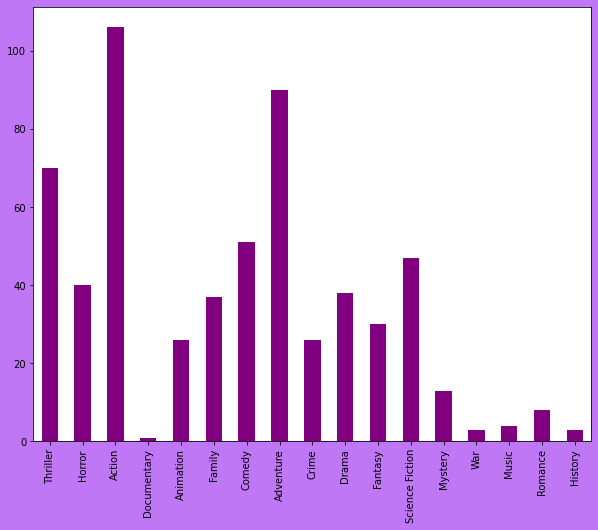

In [57]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8), edgecolor = 'k',facecolor = 'xkcd:light purple')
column_sum.plot(kind = 'bar', color = 'purple')
plt.show()

In [58]:
df.head()

,id,popularity,title,genres_list,Thriller,Horror,Action,Documentary,Animation,Family,...,Adventure,Crime,Drama,Fantasy,Science Fiction,Mystery,War,Music,Romance,History
22,23,7.820787,V/H/S,"[Thriller, Horror]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,41,2.941626,Cocaine Cowboys,"[Action, Documentary]",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46,47,16.646029,Ice Age: The Meltdown,"[Animation, Family, Comedy, Adventure]",0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
60,61,23.065078,Casino Royale,"[Adventure, Action, Thriller]",1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,70,2.238808,The Fast and the Furious: Tokyo Drift,"[Action, Crime, Drama, Thriller]",1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [59]:
df.drop(['id'],axis = 1,inplace = True)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_3008\1264036056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'],axis = 1,inplace = True)


In [60]:
df.drop(['genres_list'],axis = 1, inplace = True)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_3008\849872212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['genres_list'],axis = 1, inplace = True)


In [62]:
#df=df.sample(n = 1100, replace = False, random_state = 42)

In [63]:
df

,popularity,title,Thriller,Horror,Action,Documentary,Animation,Family,Comedy,Adventure,Crime,Drama,Fantasy,Science Fiction,Mystery,War,Music,Romance,History
22,7.820787,V/H/S,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,2.941626,Cocaine Cowboys,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
46,16.646029,Ice Age: The Meltdown,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
60,23.065078,Casino Royale,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
69,2.238808,The Fast and the Furious: Tokyo Drift,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,19.348466,Trainspotting,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2927,12.996474,Die Another Day,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2938,16.624854,Prometheus,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2968,6.514132,BloodRayne,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [64]:
X = df.set_index('title')

In [65]:
X

,popularity,Thriller,Horror,Action,Documentary,Animation,Family,Comedy,Adventure,Crime,Drama,Fantasy,Science Fiction,Mystery,War,Music,Romance,History
title,,,,,,,,,,,,,,,,,,
V/H/S,7.820787,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cocaine Cowboys,2.941626,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Ice Age: The Meltdown,16.646029,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
Casino Royale,23.065078,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
The Fast and the Furious: Tokyo Drift,2.238808,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trainspotting,19.348466,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Die Another Day,12.996474,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Prometheus,16.624854,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [66]:
# Now we have a sparse matrix 
# A sparse matrix is a matrix in which most of its elements are zero

In [67]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(X.values)

In [68]:
print(movie_features_df_matrix)

  (0, 0)	7.820787
  (0, 1)	1.0
  (0, 2)	1.0
  (1, 0)	2.941626
  (1, 3)	1.0
  (1, 4)	1.0
  (2, 0)	16.646029
  (2, 5)	1.0
  (2, 6)	1.0
  (2, 7)	1.0
  (2, 8)	1.0
  (3, 0)	23.065078
  (3, 1)	1.0
  (3, 3)	1.0
  (3, 8)	1.0
  (4, 0)	2.238808
  (4, 1)	1.0
  (4, 3)	1.0
  (4, 9)	1.0
  (4, 10)	1.0
  (5, 0)	9.665251
  (5, 2)	1.0
  (5, 7)	1.0
  (6, 0)	25.261865
  (6, 3)	1.0
  :	:
  (197, 0)	10.169411
  (197, 1)	1.0
  (197, 2)	1.0
  (197, 12)	1.0
  (197, 13)	1.0
  (198, 0)	19.348466
  (198, 9)	1.0
  (198, 10)	1.0
  (199, 0)	12.996474
  (199, 1)	1.0
  (199, 3)	1.0
  (199, 8)	1.0
  (200, 0)	16.624854
  (200, 8)	1.0
  (200, 12)	1.0
  (200, 13)	1.0
  (201, 0)	6.514132
  (201, 2)	1.0
  (201, 3)	1.0
  (201, 8)	1.0
  (201, 11)	1.0
  (202, 0)	13.334952
  (202, 1)	1.0
  (202, 3)	1.0
  (202, 9)	1.0


In [69]:
#let's fit the model
from sklearn.neighbors import NearestNeighbors

In [70]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [71]:
querry_index=np.random.choice(X.shape[0])
print(querry_index)

65


In [72]:
distances, indices = model_knn.kneighbors(np.array(X.iloc[querry_index,:].values).reshape(1, -1), n_neighbors = 6)
# This returns the distance and index of the movies

In [73]:
distances

array([[1.11022302e-16, 5.83330701e-04, 2.63196662e-03, 3.02188255e-03,
        3.54582051e-03, 3.69452034e-03]])

In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X.index[querry_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Jack Reacher:

1: The Godfather: Part III, with distance of 0.0005833307007703237:
2: Hitman, with distance of 0.002631966615508463:
3: Ocean's Thirteen, with distance of 0.003021882552382449:
4: Wall Street: Money Never Sleeps, with distance of 0.003545820513231157:
5: Trainspotting, with distance of 0.0036945203390844616:


In [75]:
for i in indices.flatten():
    if i == querry_index:
        print(f'The recommendation for movie : {X.index[querry_index]}')
    else:
        print(X.index[i])

The recommendation for movie : Jack Reacher
The Godfather: Part III
Hitman
Ocean's Thirteen
Wall Street: Money Never Sleeps
Trainspotting


In [76]:
print('My name is {0},{1}' .format('deepu','kumar'))

My name is deepu,kumar


In [77]:
for i in range(len(distances.flatten())):
    if i == 0:
        print('The recommendation for the move:{}'.format(X.index[querry_index]))
        print('')
    else:
        print('{} {} with a distance of  {}'.format(i,X.index[indices.flatten()[i]],distances.flatten()[i]))

The recommendation for the move:Jack Reacher

1 The Godfather: Part III with a distance of  0.0005833307007703237
2 Hitman with a distance of  0.002631966615508463
3 Ocean's Thirteen with a distance of  0.003021882552382449
4 Wall Street: Money Never Sleeps with a distance of  0.003545820513231157
5 Trainspotting with a distance of  0.0036945203390844616


In [524]:
# That was just a fancy way to write a print command 

In [78]:
querry_index

65

In [79]:
X.index[querry_index]

'Jack Reacher'

# Conclusion We have made a movie recommender sytem using KNN algorithm